## Geometry operation with shapely

This notebook introduces fundemental geometry such as point, linestring, and polygon, as well as basic geometry operations

In [112]:
import shapely
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

### Point

In [113]:
p1 = Point(1,2)
type(p1)

shapely.geometry.point.Point

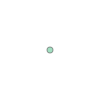

In [114]:
p1

In [115]:
p1.is_empty, p1.is_simple, p1.is_valid

(False, True, True)

In [116]:
p1.x, p1.y, p1.xy

(1.0, 2.0, (array('d', [1.0]), array('d', [2.0])))

In [117]:
p1 = p1.buffer(2)
type(p1)

shapely.geometry.polygon.Polygon

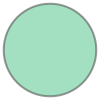

In [118]:
p1

### LineString

In [119]:
# Create a LineString from an array
point_arr = [[0, 0], [0, 1], [2, 2]]
ls = LineString(point_arr)
type(ls)

shapely.geometry.linestring.LineString

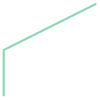

In [120]:
ls

In [121]:
ls.xy

(array('d', [0.0, 0.0, 2.0]), array('d', [0.0, 1.0, 2.0]))

In [122]:
# Create a LineString from a list of Points
p1 = Point(0, 0)
p2 = Point(0, 1)
p3 = Point(2, 2)
ls2 = LineString([p1, p2, p3])
type(ls2)

shapely.geometry.linestring.LineString

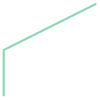

In [123]:
ls2

In [124]:
ls == ls2

True

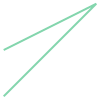

In [125]:
# The sequence of points is importance
ls3 = LineString([p1, p3, p2])
ls3

In [126]:
ls2 == ls3

False

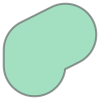

In [127]:
ls.buffer(2)

### Polygon

In [128]:
pl1 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
type(pl1)

shapely.geometry.polygon.Polygon

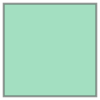

In [129]:
pl1

In [130]:
# pl2 = Polygon([ls3.xy, [1,1]])

In [131]:
def download_file(url, save_file):
    # Download and save a file from the url
    with open(save_file, 'wb') as f:
        r = requests.get(url)
        f.write(r.content)  

### Several operations

In [132]:
p1 = Point(1,1).buffer(2)
p2 = Point(3,1).buffer(1)

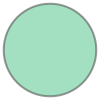

In [133]:
p1

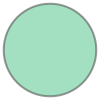

In [134]:
p2

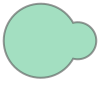

In [135]:
p1.union(p2)

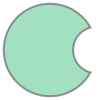

In [136]:
p1.difference(p2)

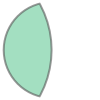

In [137]:
p1.intersection(p2)

## Spatial relationships

Source: https://github.com/geopandas/scipy2018-geospatial-data

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

![](img/TopologicSpatialRelations2.png)
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

In [142]:
point_arr = [[0, -1], [0, 1], [2, 2]]
ls = LineString(point_arr)

In [143]:
def plot_line(ax, ob, zorder=1, linewidth=3, alpha=1):
    x, y = ob.xy
    ax.plot(x, y, linewidth=linewidth, solid_capstyle='round', zorder=zorder, alpha=alpha)    

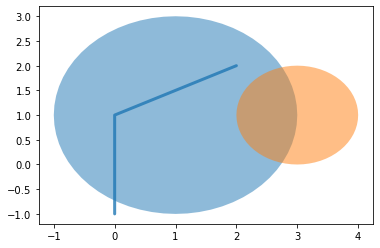

In [144]:
fig, axs = plt.subplots()
for p in [p1, p2]:
    xs, ys = p.exterior.xy
    axs.fill(xs, ys, alpha=0.5)
plot_line(axs, ls, alpha=0.8)
plt.show()

In [145]:
p1.within(p2)

False

In [146]:
p1.touches(p2)

False

In [147]:
p1.overlaps(p2)

True

In [148]:
ls.crosses(p1)

True

In [149]:
ls.crosses(p2)

False